In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
results = pd.read_csv("data/results.csv")
stats = pd.read_csv("data/stats.csv")

In [3]:
# Only selecting Manchester United
man_u = stats[stats["team"] == "Manchester United"]
man_u = man_u.reset_index()
del man_u["index"]

# Adding total games played column
# Adding numerical season column
total_lst = []
seasons_lst = []
for index, row in man_u.iterrows():
    total_lst.append(row["wins"]+row["losses"])
    seasons_lst.append(float(row["season"][:4]))
man_u["total_matches"] = total_lst
man_u["year"] = seasons_lst

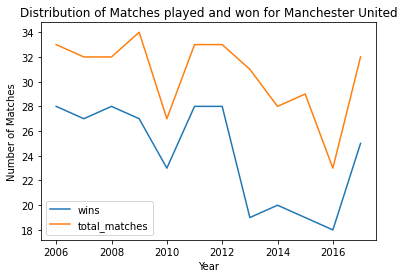

In [4]:
ax = man_u.plot.line(x="year", y="wins")
ax2 = man_u.plot.line(x="year", y="total_matches", ax=ax)
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Matches")
ax2.set_title("Distribution of Matches played and won for Manchester United")
None

# Machine learning model that predicts the number of wins 

In [5]:
stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [6]:
train, test = train_test_split(stats, random_state=320)
model1 = LinearRegression()
xcols = ["goals", "goals_conceded"]
ycols = ["wins"]
model1.fit(train[xcols], train[ycols])
model1.score(test[xcols], test[ycols])

0.931873512229606

In [7]:
scores1 = cross_val_score(model1, train[xcols], train[ycols], cv=10)
score1_mean = round(scores1.mean(), 3)
score1_std = round(scores1.std(), 3)
print("Mean: " + str(score1_mean) + "\nStandard deviation: " + str(score1_std))

Mean: 0.879
Standard deviation: 0.043


In [8]:
model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression()),
])
scores2 = cross_val_score(model, train[xcols], train[ycols], cv=10)
score2_mean = round(scores2.mean(), 3)
score2_std = round(scores2.std(), 3)
print("Mean: " + str(score2_mean) + "\nStandard deviation: " + str(score2_std))

Mean: 0.88
Standard deviation: 0.048
